# In-silico docking analysis

This notebook shows the results of in silico docking for the top20 synthetic variants

## Set up the analysis

### Import the python modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

## Boxplot for each antibody

### cb6

In [2]:
df_cb6=pd.read_excel('../data/supp_4.xlsx',sheet_name="cb6_docking_result",index_col=0)

In [3]:
df_cb6.head()

,wt,omicron,synthetic_1,synthetic_2,synthetic_3,synthetic_4,synthetic_5,synthetic_6,synthetic_7,synthetic_8,...,synthetic_11,synthetic_12,synthetic_13,synthetic_14,synthetic_15,synthetic_16,synthetic_17,synthetic_18,synthetic_19,synthetic_20
0,-22.503,-19.378,-23.859,-18.176,-11.451,-3.123,-24.417,-10.504,-18.684,-32.531,...,3.004,-18.739,-17.338,-17.799,-13.061,-26.764,-15.489,-17.866,5.984,-24.899
1,-27.888,-8.692,-11.228,-19.428,2.140,-20.211,-24.158,-32.735,-11.319,-23.961,...,-11.558,-9.425,-19.186,-8.618,-11.639,-7.666,-28.420,-19.014,-14.938,-33.437
2,-31.296,-21.818,-22.363,-21.948,-23.372,-11.434,-29.377,-31.479,-18.232,-11.255,...,-17.405,-11.549,-23.865,-10.636,-21.010,-30.533,-6.235,-9.432,-20.458,-23.301
3,-11.441,-29.639,-23.512,-20.995,-31.973,-14.286,-14.254,-12.316,-6.761,-4.608,...,-8.361,-14.107,-26.767,-4.548,-28.317,-22.902,-12.135,-5.624,-25.290,-15.005
4,-18.388,-26.152,-29.748,-20.102,-10.239,-5.680,-15.261,-22.787,-3.708,-13.437,...,-19.583,-16.494,-25.540,-25.913,-23.835,-13.588,-25.457,-18.771,-17.658,-22.323


In [4]:
df_cb6=pd.melt(df_cb6,value_name="cb6")
df_cb6.head()

,variable,cb6
0,wt,-22.503
1,wt,-27.888
2,wt,-31.296
3,wt,-11.441
4,wt,-18.388


In [5]:
## filter out the I-sc <-5
df_cb6=df_cb6[df_cb6.cb6<0]

In [6]:
for id in set(df_cb6.variable):
    if id != "omicron":
        print(id,": ",ss.ttest_ind(df_cb6[df_cb6.variable=="omicron"].cb6,df_cb6[df_cb6.variable==id].cb6))

synthetic_5 :  Ttest_indResult(statistic=1.5104385796556867, pvalue=0.13109200524637543)
synthetic_4 :  Ttest_indResult(statistic=0.8159650965048734, pvalue=0.4146186958284266)
synthetic_8 :  Ttest_indResult(statistic=1.6021170157692146, pvalue=0.10929046335100198)
synthetic_1 :  Ttest_indResult(statistic=2.7967790011885727, pvalue=0.005211538835198368)
synthetic_20 :  Ttest_indResult(statistic=2.4759922964159067, pvalue=0.013370248297564452)
synthetic_11 :  Ttest_indResult(statistic=2.0637893299843446, pvalue=0.03916872380927009)
wt :  Ttest_indResult(statistic=7.381802686156385, pvalue=2.29159816733373e-13)
synthetic_17 :  Ttest_indResult(statistic=0.4073529217389967, pvalue=0.6837930572657066)
synthetic_19 :  Ttest_indResult(statistic=1.6887576728506102, pvalue=0.09142413523279425)
synthetic_15 :  Ttest_indResult(statistic=3.052213878212752, pvalue=0.0023019060301459546)
synthetic_18 :  Ttest_indResult(statistic=4.935884388382646, pvalue=8.649231781260641e-07)
synthetic_10 :  Ttest_

In [7]:
for id in set(df_cb6.variable):
    if id != "wt":
        print(id,": ",ss.ttest_ind(df_cb6[df_cb6.variable=="wt"].cb6,df_cb6[df_cb6.variable==id].cb6))

synthetic_5 :  Ttest_indResult(statistic=-5.2435988181411375, pvalue=1.7437379700658568e-07)
synthetic_4 :  Ttest_indResult(statistic=-5.6686501592808725, pvalue=1.6514994054215655e-08)
synthetic_8 :  Ttest_indResult(statistic=-4.787527834536454, pvalue=1.8145869181563904e-06)
synthetic_1 :  Ttest_indResult(statistic=-3.9492396251626065, pvalue=8.115306342959156e-05)
synthetic_20 :  Ttest_indResult(statistic=-4.2761093265309364, pvalue=1.9929455403636173e-05)
synthetic_11 :  Ttest_indResult(statistic=-4.332194822067698, pvalue=1.5507443598006695e-05)
synthetic_17 :  Ttest_indResult(statistic=-6.057828784371526, pvalue=1.6484003695134824e-09)
synthetic_19 :  Ttest_indResult(statistic=-5.060319014049477, pvalue=4.574503941813928e-07)
synthetic_15 :  Ttest_indResult(statistic=-3.789354871024851, pvalue=0.000155568134894876)
synthetic_18 :  Ttest_indResult(statistic=-1.8188945030283254, pvalue=0.06907913247104228)
synthetic_10 :  Ttest_indResult(statistic=-4.481959724854199, pvalue=7.82086

Text(0, 0.5, 'Binding score')

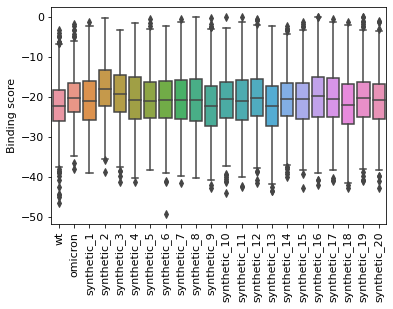

In [8]:
plt.rcParams.update({'font.size': 11})
ax=sns.boxplot(x="variable",y="cb6",data=df_cb6)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel("")
ax.set_ylabel("Binding score")
#plt.savefig('figures/cb6_docking.png',dpi=500,bbox_inches="tight")

### Cr3022

In [9]:
df_cr3022=pd.read_excel('../data/supp_4.xlsx',sheet_name="cr3022_docking_result",index_col=0)

In [10]:
df_cr3022.head()

,wt,omicron,synthetic_1,synthetic_2,synthetic_3,synthetic_4,synthetic_5,synthetic_6,synthetic_7,synthetic_8,...,synthetic_11,synthetic_12,synthetic_13,synthetic_14,synthetic_15,synthetic_16,synthetic_17,synthetic_18,synthetic_19,synthetic_20
0,1.811,-29.837,-27.800,2.310,-30.422,-27.718,2.647,-34.816,-28.723,-15.659,...,-26.806,-3.979,2.777,-32.055,-10.415,-18.010,4.291,2.559,-26.980,-15.841
1,2.996,-25.859,-20.013,-26.690,-28.738,2.897,-20.317,-18.162,-35.476,-20.729,...,-24.998,-23.262,-16.695,2.135,-27.235,-19.607,-13.205,2.210,-22.672,-27.231
2,-35.142,-20.923,-28.735,-26.916,-22.903,-18.875,-20.189,-30.274,-28.895,-24.467,...,-12.268,-21.127,-24.369,-15.255,-24.532,2.047,-20.516,2.402,-18.364,-9.980
3,-43.982,-15.013,-23.000,-36.407,-27.820,-28.954,-21.884,-22.756,-33.967,-20.878,...,-29.341,-10.362,-19.734,-17.618,-20.659,-27.916,-6.778,-22.885,-18.912,-28.941
4,-40.515,-32.767,-29.581,-24.890,-25.893,-32.786,-25.725,-23.140,-26.255,-10.995,...,2.303,-30.051,-34.651,-27.012,-16.247,-20.372,1.845,-14.299,-17.856,-17.011


In [11]:
df_cr3022=pd.melt(df_cr3022,value_name="cr3022")
df_cr3022.head()

,variable,cr3022
0,wt,1.811
1,wt,2.996
2,wt,-35.142
3,wt,-43.982
4,wt,-40.515


In [12]:
## filter out the I-sc <-5
df_cr3022=df_cr3022[df_cr3022.cr3022<0]

In [13]:
for id in set(df_cr3022.variable):
    if id != "omicron":
        print(id,": ",ss.ttest_ind(df_cr3022[df_cr3022.variable=="omicron"].cr3022,df_cr3022[df_cr3022.variable==id].cr3022))

synthetic_5 :  Ttest_indResult(statistic=0.6589899595795131, pvalue=0.5099793107382347)
synthetic_4 :  Ttest_indResult(statistic=10.748643041058566, pvalue=3.1772991179661243e-26)
synthetic_8 :  Ttest_indResult(statistic=-1.430175482790104, pvalue=0.15282515802924082)
synthetic_1 :  Ttest_indResult(statistic=9.323776503830025, pvalue=2.9178474218480685e-20)
synthetic_20 :  Ttest_indResult(statistic=-0.43896432421315823, pvalue=0.6607356236137645)
synthetic_11 :  Ttest_indResult(statistic=-0.3769122820311819, pvalue=0.7062794292128597)
wt :  Ttest_indResult(statistic=40.08449847611768, pvalue=2.4279188915551787e-257)
synthetic_17 :  Ttest_indResult(statistic=3.25712091705949, pvalue=0.0011446550563362315)
synthetic_19 :  Ttest_indResult(statistic=-0.6334303728024276, pvalue=0.5265260901987348)
synthetic_15 :  Ttest_indResult(statistic=1.2899973678878078, pvalue=0.19720297712404422)
synthetic_18 :  Ttest_indResult(statistic=1.9741252601745298, pvalue=0.04850742510312927)
synthetic_10 :  

In [14]:
for id in set(df_cr3022.variable):
    if id != "wt":
        print(id,": ",ss.ttest_ind(df_cr3022[df_cr3022.variable=="wt"].cr3022,df_cr3022[df_cr3022.variable==id].cr3022))

synthetic_5 :  Ttest_indResult(statistic=-39.32585944869873, pvalue=6.830057317873526e-250)
synthetic_4 :  Ttest_indResult(statistic=-31.683279917162047, pvalue=3.5512125767582495e-178)
synthetic_8 :  Ttest_indResult(statistic=-39.19735402390832, pvalue=9.359414274030582e-249)
synthetic_1 :  Ttest_indResult(statistic=-28.98873411133183, pvalue=4.7027708955619464e-154)
synthetic_20 :  Ttest_indResult(statistic=-38.61746132977163, pvalue=4.504369111768967e-243)
synthetic_11 :  Ttest_indResult(statistic=-38.47700266299575, pvalue=8.592520765565803e-242)
synthetic_17 :  Ttest_indResult(statistic=-35.58835533479729, pvalue=2.2616181485976104e-214)
synthetic_19 :  Ttest_indResult(statistic=-39.24215745850568, pvalue=3.2561161616320356e-249)
synthetic_15 :  Ttest_indResult(statistic=-37.00510372414297, pvalue=7.349049993011085e-228)
synthetic_18 :  Ttest_indResult(statistic=-38.366685466762696, pvalue=1.257033332637696e-240)
synthetic_10 :  Ttest_indResult(statistic=-42.00852700685624, pvalue

Text(0, 0.5, 'Binding score')

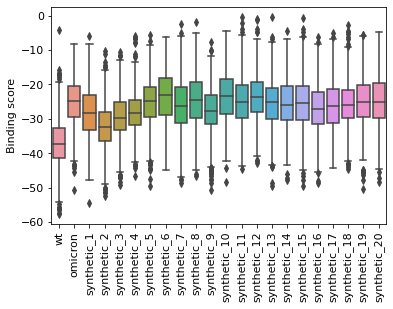

In [15]:
ax=sns.boxplot(x="variable",y="cr3022",data=df_cr3022)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel("")
ax.set_ylabel("Binding score")
#plt.savefig('figures/cr3022_docking.png',dpi=500,bbox_inches="tight")

### S309

In [16]:
df_S309=pd.read_excel('../data/supp_4.xlsx',sheet_name="S309_docking_result",index_col=0)

In [17]:
df_S309.head()

,wt,omicron,synthetic_1,synthetic_2,synthetic_3,synthetic_4,synthetic_5,synthetic_6,synthetic_7,synthetic_8,...,synthetic_11,synthetic_12,synthetic_13,synthetic_14,synthetic_15,synthetic_16,synthetic_17,synthetic_18,synthetic_19,synthetic_20
0,-40.730,-7.824,-27.173,-22.279,1.745,-11.720,1.682,-30.544,2.034,-11.779,...,-17.715,-21.034,-29.586,2.421,-14.625,1.726,-13.389,-20.648,-23.191,-25.671
1,-14.226,-15.105,2.128,-20.578,-20.909,-31.934,-7.856,-17.399,-26.101,-14.320,...,-14.679,-19.677,-23.737,-20.859,-19.181,-15.497,-7.261,-16.691,-33.098,-22.494
2,1.717,-30.291,-28.963,-12.876,1.846,-28.506,-11.222,-24.729,2.565,-13.622,...,-6.642,-15.175,-24.206,-14.950,-6.307,6.385,45.067,-10.144,-27.818,-20.572
3,-30.892,-32.228,-15.697,-17.749,-21.544,-16.349,-13.106,-22.440,-20.937,-18.833,...,-17.483,-14.526,-10.831,-20.969,-24.191,-12.171,-10.720,-20.503,-11.107,-23.231
4,-27.223,-22.927,-6.285,-19.178,-19.603,-30.107,-28.589,-19.010,-24.244,-16.035,...,-17.549,-18.697,-31.061,-21.683,-26.271,-11.707,-7.302,-25.513,-29.682,-19.803


In [18]:
df_S309=pd.melt(df_S309,value_name="S309")
df_S309.head()

,variable,S309
0,wt,-40.730
1,wt,-14.226
2,wt,1.717
3,wt,-30.892
4,wt,-27.223


In [19]:
## filter out the I-sc >0
df_S309=df_S309[df_S309.S309<0]

In [20]:
for id in set(df_S309.variable):
    if id != "omicron":
        print(id,": ",ss.ttest_ind(df_S309[df_S309.variable=="omicron"].S309,df_S309[df_S309.variable==id].S309))

synthetic_5 :  Ttest_indResult(statistic=-0.015112997537808774, pvalue=0.9879436183228254)
synthetic_4 :  Ttest_indResult(statistic=7.714137894851665, pvalue=1.946582891204482e-14)
synthetic_8 :  Ttest_indResult(statistic=-21.35820205199874, pvalue=6.512620143023237e-91)
synthetic_1 :  Ttest_indResult(statistic=-6.358338825637283, pvalue=2.5461712096889685e-10)
synthetic_20 :  Ttest_indResult(statistic=-8.972051925178196, pvalue=6.799796373504726e-19)
synthetic_11 :  Ttest_indResult(statistic=-21.94650266881332, pvalue=2.1082102381411325e-95)
wt :  Ttest_indResult(statistic=9.72730550087918, pvalue=7.416297250382853e-22)
synthetic_17 :  Ttest_indResult(statistic=-23.028962255493376, pvalue=1.0758662816453126e-103)
synthetic_19 :  Ttest_indResult(statistic=-5.7427179595497, pvalue=1.0834548033954196e-08)
synthetic_15 :  Ttest_indResult(statistic=-5.836296376827764, pvalue=6.257099981155139e-09)
synthetic_18 :  Ttest_indResult(statistic=5.675511726555938, pvalue=1.595794742602143e-08)
sy

In [21]:
for id in set(df_S309.variable):
    if id != "wt":
        print(id,": ",ss.ttest_ind(df_S309[df_S309.variable=="wt"].S309,df_S309[df_S309.variable==id].S309))

synthetic_5 :  Ttest_indResult(statistic=-9.933271433602151, pvalue=1.0580815602018427e-22)
synthetic_4 :  Ttest_indResult(statistic=-2.46515325792275, pvalue=0.01378294494718901)
synthetic_8 :  Ttest_indResult(statistic=-33.644566855043664, pvalue=4.311939224654345e-195)
synthetic_1 :  Ttest_indResult(statistic=-17.444067320832165, pvalue=2.502552273606757e-63)
synthetic_20 :  Ttest_indResult(statistic=-20.227182550503485, pvalue=1.511823614763182e-82)
synthetic_11 :  Ttest_indResult(statistic=-34.46218831750024, pvalue=8.769219521598898e-203)
synthetic_17 :  Ttest_indResult(statistic=-35.22910955620965, pvalue=1.4811907090747855e-209)
synthetic_19 :  Ttest_indResult(statistic=-16.786411409520166, pvalue=4.813744451838869e-59)
synthetic_15 :  Ttest_indResult(statistic=-17.63264266031323, pvalue=1.4156256126291641e-64)
synthetic_18 :  Ttest_indResult(statistic=-4.497177659428301, pvalue=7.302933800706422e-06)
synthetic_10 :  Ttest_indResult(statistic=-17.63340298591977, pvalue=1.407045

Text(0, 0.5, 'Binding score')

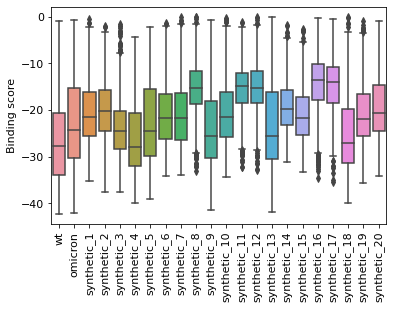

In [22]:
ax=sns.boxplot(x="variable",y="S309",data=df_S309)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel("")
ax.set_ylabel("Binding score")
#plt.savefig('figures/S309_docking.png',dpi=500,bbox_inches="tight")

### CoV555

In [23]:
df_cov555=pd.read_excel('../data/supp_4.xlsx',sheet_name="COV555_docking_result",index_col=0)

In [24]:
df_cov555.head()

,wt,omicron,synthetic_1,synthetic_2,synthetic_3,synthetic_4,synthetic_5,synthetic_6,synthetic_7,synthetic_8,...,synthetic_11,synthetic_12,synthetic_13,synthetic_14,synthetic_15,synthetic_16,synthetic_17,synthetic_18,synthetic_19,synthetic_20
0,-11.657,-20.318,-18.616,-28.198,2.462,-26.475,-36.043,-37.991,1.416,2.825,...,-30.750,-26.438,-21.603,-36.986,-21.222,-28.102,-27.756,-23.268,-23.754,1.917
1,-23.721,-18.142,-19.763,-23.597,-33.608,-26.112,-24.655,-25.687,-24.281,-28.996,...,-33.136,-16.896,-23.207,-31.022,-31.197,-24.097,-24.723,-23.389,-22.631,-35.587
2,-30.506,-27.136,-20.816,-17.158,-8.843,-21.786,-30.924,-31.955,-34.447,-26.631,...,-30.996,-21.793,-28.365,-33.886,1.373,2.054,-13.877,-16.137,-32.102,-34.303
3,-47.626,-33.015,-23.642,-32.380,-18.713,-15.254,-28.091,-27.660,-13.143,-26.061,...,-22.760,-24.175,-13.083,-26.675,-35.989,-29.846,-12.260,-26.905,-12.230,-26.557
4,-24.446,-25.418,-21.700,-23.886,-26.376,-29.358,-19.681,-34.100,-28.886,-19.098,...,-17.889,-28.051,-26.810,-31.922,-20.067,-10.216,-17.663,-33.091,-37.015,-34.907


In [25]:
df_cov555=pd.melt(df_cov555,value_name="cov555")
df_cov555.head()

,variable,cov555
0,wt,-11.657
1,wt,-23.721
2,wt,-30.506
3,wt,-47.626
4,wt,-24.446


In [26]:
## filter out the I-sc <-5
df_cov555=df_cov555[df_cov555.cov555<0]

In [27]:
for id in set(df_cov555.variable):
    if id != "omicron":
        print(id,": ",ss.ttest_ind(df_cov555[df_cov555.variable=="omicron"].cov555,df_cov555[df_cov555.variable==id].cov555))

synthetic_5 :  Ttest_indResult(statistic=3.3261504927797656, pvalue=0.0008972212680918188)
synthetic_4 :  Ttest_indResult(statistic=0.7809501763127058, pvalue=0.43492772484380693)
synthetic_8 :  Ttest_indResult(statistic=0.8179780839217953, pvalue=0.4134714122458565)
synthetic_1 :  Ttest_indResult(statistic=-4.30306694233116, pvalue=1.7688997095590617e-05)
synthetic_20 :  Ttest_indResult(statistic=6.008592080666317, pvalue=2.230972662792324e-09)
synthetic_11 :  Ttest_indResult(statistic=0.6973529947078144, pvalue=0.48566612127097286)
wt :  Ttest_indResult(statistic=17.989195362869975, pvalue=5.324677433994993e-67)
synthetic_17 :  Ttest_indResult(statistic=0.4571111013718862, pvalue=0.6476427168346697)
synthetic_19 :  Ttest_indResult(statistic=12.484081678009552, pvalue=1.8983095470262248e-34)
synthetic_15 :  Ttest_indResult(statistic=6.174866717288986, pvalue=8.052931928583686e-10)
synthetic_18 :  Ttest_indResult(statistic=-2.146843931604002, pvalue=0.03193043622984462)
synthetic_10 : 

In [28]:
for id in set(df_cov555.variable):
    if id != "wt":
        print(id,": ",ss.ttest_ind(df_cov555[df_cov555.variable=="wt"].cov555,df_cov555[df_cov555.variable==id].cov555))

synthetic_5 :  Ttest_indResult(statistic=-14.180743773972251, pvalue=1.7102174295801973e-43)
synthetic_4 :  Ttest_indResult(statistic=-17.318486645041933, pvalue=1.3329716790982032e-62)
synthetic_8 :  Ttest_indResult(statistic=-17.113097838635014, pvalue=3.0513620407259084e-61)
synthetic_1 :  Ttest_indResult(statistic=-21.777780770256754, pvalue=2.858730525459579e-94)
synthetic_20 :  Ttest_indResult(statistic=-11.944475931633564, pvalue=8.669852177414755e-32)
synthetic_11 :  Ttest_indResult(statistic=-17.798388265812452, pvalue=9.138512923240562e-66)
synthetic_17 :  Ttest_indResult(statistic=-17.94022968916141, pvalue=1.0179459794159616e-66)
synthetic_19 :  Ttest_indResult(statistic=-6.446512262481748, pvalue=1.4403899131489855e-10)
synthetic_15 :  Ttest_indResult(statistic=-10.142581996812778, pvalue=1.3641453132663842e-23)
synthetic_18 :  Ttest_indResult(statistic=-20.130820313663396, pvalue=5.276831258972768e-82)
synthetic_10 :  Ttest_indResult(statistic=-19.142728400992866, pvalue=

Text(0, 0.5, 'Binding score')

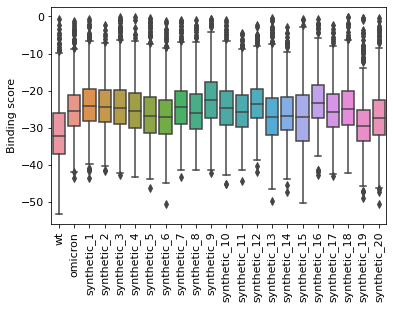

In [29]:
ax=sns.boxplot(x="variable",y="cov555",data=df_cov555)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel("")
ax.set_ylabel("Binding score")
#plt.savefig('figures/cov555_docking.png',dpi=500,bbox_inches="tight")

## Heatmap

In [30]:
sum_df=pd.concat([df_cr3022.groupby(['variable']).mean(),df_cb6.groupby(['variable']).mean(),df_cov555.groupby(['variable']).mean(),df_S309.groupby(['variable']).mean()],axis=1)
sum_df

,cr3022,cb6,cov555,S309
variable,,,,
omicron,-25.100589,-20.258981,-25.015017,-22.908123
synthetic_1,-28.009422,-21.046083,-23.662971,-20.563666
synthetic_10,-23.844857,-20.902449,-24.517747,-20.433902
synthetic_11,-24.982604,-20.870453,-25.226551,-15.445429
synthetic_12,-23.652202,-20.110961,-23.083256,-15.295732
synthetic_13,-25.711745,-22.602733,-26.587780,-23.584763
synthetic_14,-25.618563,-20.649062,-26.215962,-19.361272
synthetic_15,-25.502481,-21.106814,-27.274549,-20.879904
synthetic_16,-26.833429,-19.942359,-22.686148,-14.552778


In [31]:
sum_df=sum_df.rename(columns={"cr3022":"CR3022","cb6":"LY-CoV16","cov555":"LY-CoV555"})

In [32]:
minus_wt=(sum_df.iloc[:-1]-sum_df.iloc[-1])

In [33]:
minus_wt

,CR3022,LY-CoV16,LY-CoV555,S309
variable,,,,
omicron,12.033520,1.964452,6.284214,3.942176
synthetic_1,9.124687,1.177350,7.636259,6.286634
synthetic_10,13.289252,1.320984,6.781484,6.416397
synthetic_11,12.151505,1.352980,6.072679,11.404870
synthetic_12,13.481907,2.112472,8.215974,11.554567
synthetic_13,11.422364,-0.379300,4.711450,3.265537
synthetic_14,11.515546,1.574371,5.083268,7.489027
synthetic_15,11.631628,1.116619,4.024681,5.970395
synthetic_16,10.300680,2.281074,8.613082,12.297521


In [34]:
plt.rcParams.update({'font.size': 11})

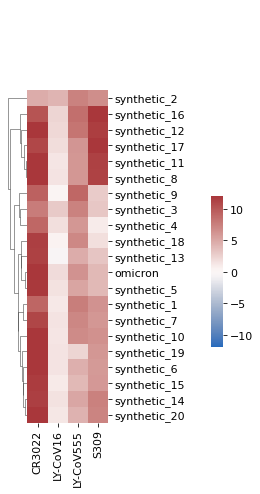

In [35]:
g=sns.clustermap(minus_wt,cmap="vlag",figsize=(3,7),vmin=-12,vmax=12,col_cluster=False)
ax = g.ax_heatmap
#ax.set_xticklabels(["CR3022","LY-CoV16","LY-CoV555","S309"],rotation=90)
#ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
g.ax_cbar.set_position((1, .3, .055, .3))
#plt.savefig('figures/heatmap_wt_docking_label.png',dpi=500,bbox_inches = 'tight')


In [36]:
minus_om=(sum_df.iloc[1:]-sum_df.iloc[0])

In [37]:
minus_om

,CR3022,LY-CoV16,LY-CoV555,S309
variable,,,,
synthetic_1,-2.908833,-0.787102,1.352046,2.344458
synthetic_10,1.255732,-0.643469,0.497270,2.474221
synthetic_11,0.117985,-0.611472,-0.211535,7.462694
synthetic_12,1.448387,0.148019,1.931760,7.612391
synthetic_13,-0.611156,-2.343752,-1.572764,-0.676639
synthetic_14,-0.517974,-0.390082,-1.200945,3.546851
synthetic_15,-0.401892,-0.847833,-2.259532,2.028219
synthetic_16,-1.732840,0.316622,2.328868,8.355345
synthetic_17,-1.000642,-0.117534,-0.139393,8.037447


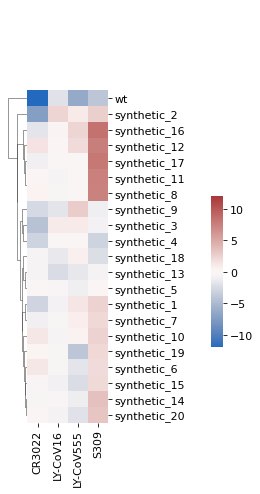

In [38]:
g=sns.clustermap(minus_om,cmap="vlag",figsize=(3,7),col_cluster=False,vmin=-12,vmax=12)
ax = g.ax_heatmap
#ax.set_xticklabels(["LY-CoV555","S309","CR3022","LY-CoV16"],rotation=90)
#ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
#g.fig.subplots_adjust(right=0.7)
g.ax_cbar.set_position((1, .3, .055, .3))
#plt.savefig('figures/heatmap_omicron_docking_label.png',dpi=500,bbox_inches = 'tight')
